In [2]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import numpy as np
import pandas as pd
import random

In [3]:
# Read CSV, parse dates, and set index
csvpath = Path('Resources/Week10-Day2-Activity4-yield.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [4]:
df.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


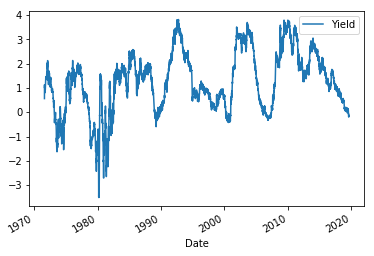

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

ADF Statistic: -3.393721
p-value:        0.011175 
Lags used:      31
Critical Values:
('1%', -3.430897660224935)
('5%', -2.861782037578331)
('10%', -2.566898831549907)


True

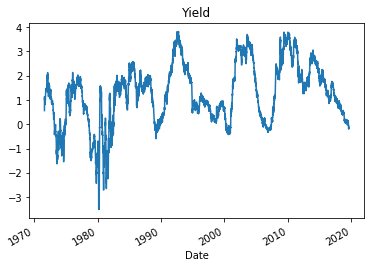

In [8]:
is_stationary(df['Yield'])

In [11]:
df['PercentageChange'] = df['Yield'].pct_change()
df.dropna(inplace=True)
df.head()

,Yield,PercentageChange
Date,,
1971-08-17,0.7108,0.262074
1971-08-18,1.0657,0.499297
1971-08-19,1.1335,0.063620
1971-08-20,1.0313,-0.090163
1971-08-23,0.9753,-0.054300


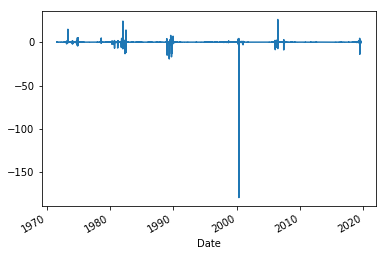

In [12]:
df['PercentageChange'].plot()

ADF Statistic: -80.008763
p-value:        0.000000 
Lags used:      1
Critical Values:
('1%', -3.430896333332702)
('5%', -2.8617814512143247)
('10%', -2.56689851943124)


True

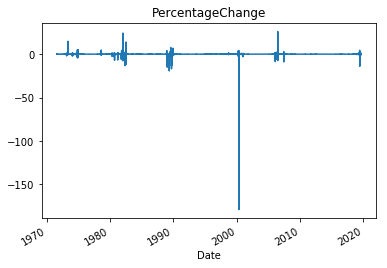

In [13]:
is_stationary(df['PercentageChange'])

In [14]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
from statsmodels.tsa.stattools import adfuller
adfuller(df.Yield)

(-3.3930556167682386,
 0.011197895471139058,
 31,
 11942,
 {'1%': -3.430897706094807,
  '5%': -2.86178205784858,
  '10%': -2.566898842339661},
 -34554.052192451694)

# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

In [18]:
# Plot the autocorrelation of the yield data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


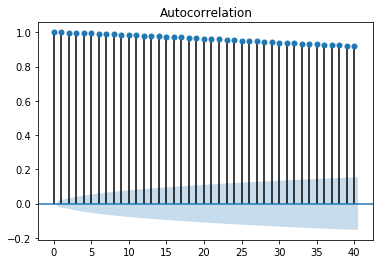

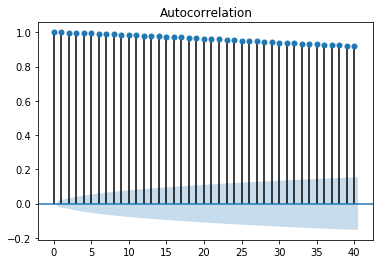

In [20]:
plot_acf(df['Yield'], lags=40)

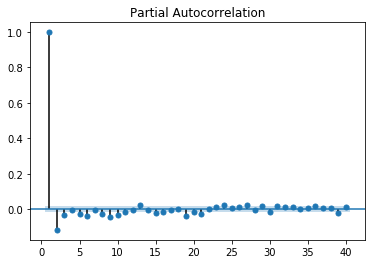

In [21]:
# Plot the partial autocorrelation of the yield data
plot_pacf(df['Yield'], zero=False, lags=40);

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [22]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df['Yield'].values, order=(2, 2))
result = model.fit()
result.summary()

/Users/satishsurath/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44233D+00    |proj g|=  5.60085D-04

At iterate    5    f= -1.44234D+00    |proj g|=  7.96807D-04

At iterate   10    f= -1.44236D+00    |proj g|=  3.19433D-04

At iterate   15    f= -1.44380D+00    |proj g|=  3.27978D-03

At iterate   20    f= -1.44434D+00    |proj g|=  5.60929D-04

At iterate   25    f= -1.44435D+00    |proj g|=  8.55094D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     78      2     0     0   1.754D-06  -1.444D+00
  F =  -1.4443468535556347     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/satishsurath/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11974
Model:                     ARMA(2, 2)   Log Likelihood               17294.609
Method:                       css-mle   S.D. of innovations              0.057
Date:                Mon, 25 Apr 2022   AIC                         -34577.218
Time:                        20:37:15   BIC                         -34532.875
Sample:                             0   HQIC                        -34562.342
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1878      0.318      3.741      0.000       0.565       1.810
ar.L1.y        1.9152      0.004    481.113      0.000       1.907       1.923
ar.L2.y       -0.9154      0.004   -230.332      0.000      -0.923      -0.908
ma.L1.y       -0.8043      0.010    -81.160      0.000      -0.824      -0.785
ma.L2.y       -0.0686      0.009     -7.570      0.000      -0.086      -0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0898           +0.0000j            1.0898            0.0000
MA.1            1.1337           +0.0000j            1.1337            0.0000
MA.2          -12.8532           +0.0000j           12.8532            0.5000
-----------------------------------------------------------------------------
"""

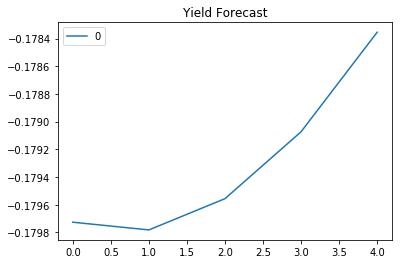

In [23]:
pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Yield Forecast")